<a href="https://colab.research.google.com/github/AliEbadi110/Tabular-Data-Classification-Sample-Projects/blob/main/Tabular_Data_Scikit_Learn_Classification_Logistic_Regression_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tabular Data - Scikit Learn - Classification - Logistic Regression - Titanic**

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

## 1. Loading Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Datasets/Titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Exploring Data

In [ ]:
df.shape

(891, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [ ]:
df.describe(include=['object']).transpose()

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


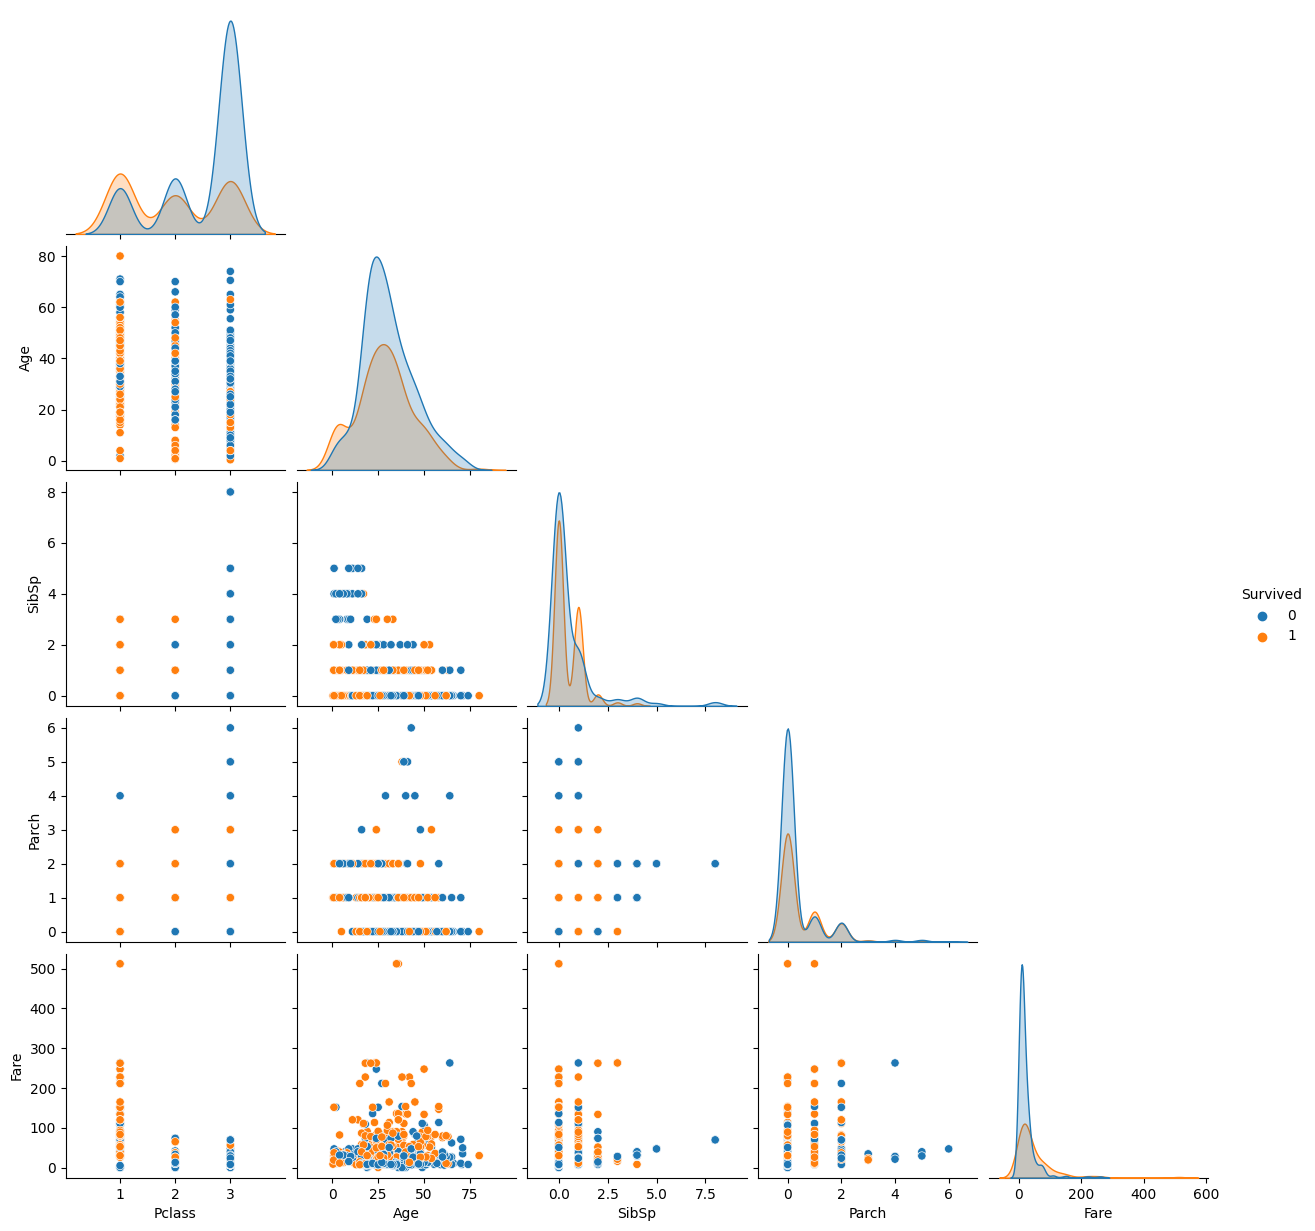

In [ ]:
sns.pairplot(data=df.drop(columns=['PassengerId']), hue='Survived', corner=True)

## 3. Target Variable Preprocessing

In [ ]:
df.Survived.describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [ ]:
df.Survived.isnull().sum()

0

In [ ]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

<Axes: xlabel='count', ylabel='Survived'>

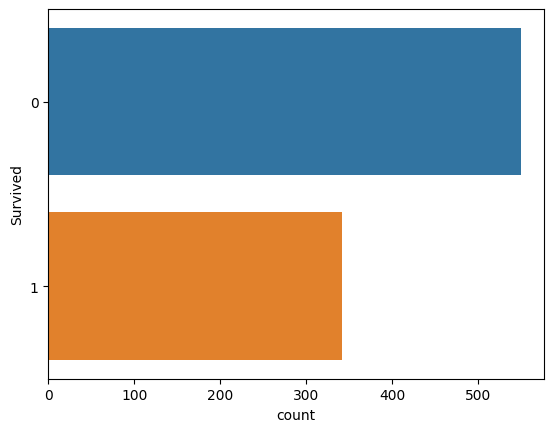

In [ ]:
sns.countplot(data=df, y='Survived',)

In [ ]:
target = df.Survived

## 4. Removing Target Feature and Useless Features

In [ ]:
df.drop(columns=['Survived', 'PassengerId', 'Name', 'Ticket'], inplace=True)
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,NaN,S
887,1,female,19.0,0,0,30.0000,B42,S
888,3,female,NaN,1,2,23.4500,NaN,S
889,1,male,26.0,0,0,30.0000,C148,C


## 5. Handling Missing Values

In [ ]:
df.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

<Axes: >

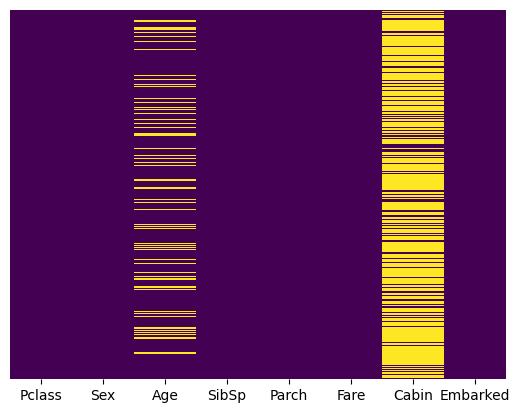

In [ ]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

> **Cabin**

In [ ]:
df.drop(columns='Cabin', inplace=True)

> **Sex**

In [ ]:
lower = df.Age.min()
upper = df.Age.max()
mu = df.Age.mean()
sigma = df.Age.std()
N = df.Age.isnull().sum()

s = scipy.stats.truncnorm.rvs(
          (lower-mu)/sigma, (upper-mu)/sigma, loc=mu, scale=sigma, size=N)

In [ ]:
mv_index = df[df.Age.isnull()].index
df.Age.fillna(pd.Series(s, index=mv_index), inplace=True)

> **Embarked**

In [ ]:
df.dropna(inplace=True)
df.shape

(889, 7)

## 6. Handling Categorical features

In [ ]:
df.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [ ]:
{col: df[col].nunique() for col in df if df[col].dtype == object}

{'Sex': 2, 'Embarked': 3}

> **Sex**

In [ ]:
df.Sex.value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [ ]:
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

> **Embarked**

In [ ]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

> **Pclass**

In [ ]:
df.Pclass.value_counts()

3    491
1    214
2    184
Name: Pclass, dtype: int64

In [ ]:
df = pd.get_dummies(df, columns=['Pclass'], drop_first=True)

## 7. Check Correlations

In [ ]:
df['Target'] = target

In [ ]:
df.corr()[['Target']].style.background_gradient(cmap='Greens')

,Target
Sex,-0.541585
Age,-0.077364
SibSp,-0.034040
Parch,0.083151
Fare,0.255290
Embarked_Q,0.004536
Embarked_S,-0.151777
Pclass_2,0.095002
Pclass_3,-0.320171
Target,1.000000


## 8. Train_Test_Split

In [ ]:
y = df.Target
X = df.drop(columns=['Target'])

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## 9. Define, Fit

In [ ]:
lrmodel = LogisticRegression(solver='liblinear')
lrmodel.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

## 10. Predict, Evaluate

In [ ]:
lr_predictions = lrmodel.predict(X_val)

In [ ]:
print(classification_report(y_val, lr_predictions))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       109
           1       0.76      0.74      0.75        69

    accuracy                           0.81       178
   macro avg       0.80      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178



In [ ]:
print(confusion_matrix(y_val, lr_predictions))

[[93 16]
 [18 51]]
